In [1]:
from transformers import GPT2LMHeadModel
import torch.nn as nn

/Users/zitian.zhao/miniforge3/envs/transformer/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M parameters
sd_hf = model_hf.state_dict()

for k,v in sd_hf.items():
    print(f"{k} {v.shape}")
# The output will show the shapes of the model's parameters, such as:

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [3]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

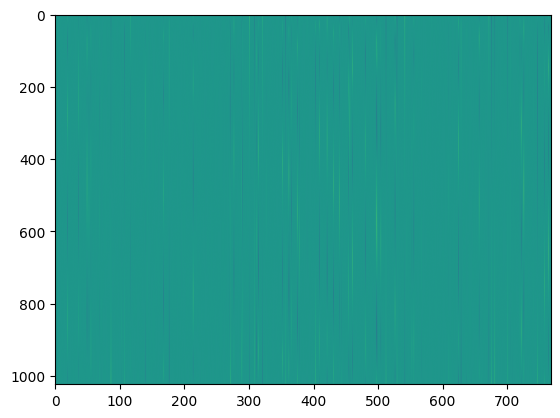

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"],cmap='viridis', aspect='auto')

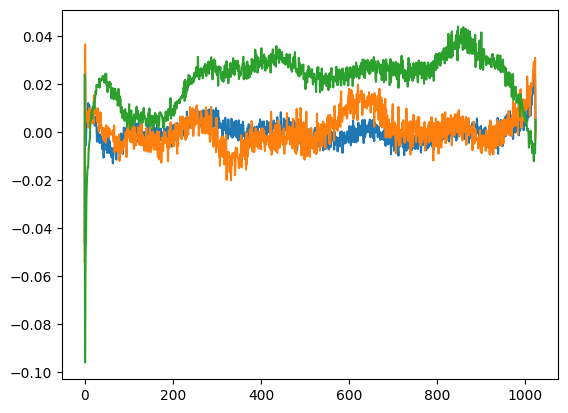

In [5]:
plt.plot(sd_hf["transformer.wpe.weight"][:,150])
plt.plot(sd_hf["transformer.wpe.weight"][:,200])
plt.plot(sd_hf["transformer.wpe.weight"][:,250])

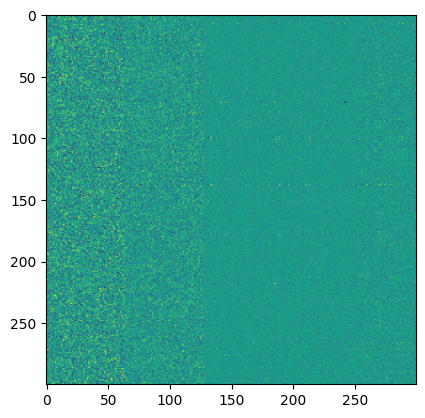

In [6]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300,:300], cmap='viridis')

In [7]:
from transformers import pipeline,set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/Users/zitian.zhao/miniforge3/envs/transformer/lib/python3.12/site-packages/transformers/pytorch_utils.py:335: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_elements = torch.tensor(test_elements)
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://

[{'generated_text': "Hello, I'm a language model, and my project is based on the idea of a language model.\n\nI want to have a language that's both expressive and readable.\n\nLet's look at the following code:\n\nimport Data.ByteString\n\ndef get ( self ):\n\nself.data = Data.ByteString(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data"},
 {'generated_text': "Hello, I'm a language model, not a language model, and if I don't understand it, I won't learn to write it. So I was writing a system for programming in JavaScript and a s

##### test code 
- B,T,C = x.size()
- qkv = self.c_attn(x)
- q,k,v = qkv.split(self.n_embd,dim=2)


In [8]:
import torch
n_embd = 3
c_attn = nn.Linear(n_embd,3 * n_embd)
x = torch.tensor([[1.,3.,4.],[2.,4.,6.]],dtype=torch.float32)
x = x.view(-1,2,3)
y = c_attn(x)
print("c_attn.weight.shape: ",c_attn.weight.shape)
print("c_attn.shape: ",y.shape)
q,k,v = y.split(n_embd,dim=2)
print("q.shape,k.shape,v.shape: ",q.shape,k.shape,v.shape)

c_attn.weight.shape:  torch.Size([9, 3])
c_attn.shape:  torch.Size([1, 2, 9])
q.shape,k.shape,v.shape:  torch.Size([1, 2, 3]) torch.Size([1, 2, 3]) torch.Size([1, 2, 3])


In [21]:
import torch
from torch.nn import functional as F

model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()
# device detection code:
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = "mps"
print(f"using device: {device}")

model.to(device)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
tokens = [15496, 11, 314, 1101, 257, 3303, 2746, 11] # "Hello, I'm a language model,"  https://tiktokenizer.vercel.app/?model=gpt2
tokens = torch.tensor(tokens,dtype = torch.long)
tokens = tokens.unsqueeze(0).repeat(5,1)
x = tokens.to(device)

#print("model: ",model)

while x.size(1) < 30:
    with torch.no_grad():
        logits = model(x)[0] # (B,T,vocab_size)
        logits = logits[:,-1,:] # get the last token logits (B,vocab_size)
        probs = F.softmax(logits,dim=-1) # (B,vocab_size)
        topk_probs,topk_indices = torch.topk(probs,50,dim=-1) # (B,50) (B,50)
        ix = torch.multinomial(topk_probs,1) # (B,1)
        xcol = torch.gather(topk_indices,-1,ix) #(B,1)
        x = torch.cat((x,xcol),dim=1) # (B,T+1)

import tiktoken
enc = tiktoken.get_encoding("gpt2")
for i in range(5):
    tokens = x[i,:30].tolist()
    decoded = enc.decode(tokens)
    print(">",decoded)


using device: mps
> Hello, I'm a language model, which means I'm familiar with it, but I'm not fluent in that. Well, with that said,
> Hello, I'm a language model, and the syntax, to make use of it, is pretty good. So why do you have that and not
> Hello, I'm a language model, I'm doing this work in Python, and then I'm writing code for Haskell.

So we can
> Hello, I'm a language model, and you're making assumptions about my use of them. I'm not a natural language learner. I'm
> Hello, I'm a language model, well, I'm from Java and have to write a programming language for it. I have my own vocabulary because


In [27]:
!curl -O https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


100 1089k  100 1089k    0     0  2183k      0 --:--:-- --:--:-- --:--:-- 2187k


In [28]:
with open('input.txt','r') as f:
    text = f.read()

data = text[:1000]
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [29]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [ ]:
import torch
buf = torch.tensor(tokens[:24+1])
x = buf[:-1].view(4,6)
y = buf[1:].view(4,6)
print(x)
print(y)